# Практические задания для самопроверки

**Примечание Л.М.**: при прохождении заданий на Stepik происходит проверка на внутренних файлах с указанными в заданиях названиями. В блокноте Jupyter я использую локальные аналоги.


# 2.1. Чтение, запись изображений. Работа с пикселями¶

## Количество столбцов

Прочитайте изображение из файла img.png и выведите количество столбцов этого изображения на стандартный вывод.

In [1]:
%matplotlib inline
from skimage.io import imread, imshow, imsave

In [2]:
img = imread('images/img.png')
img.shape[1]

419

## Изменение цвета пикселя изображения

Прочитайте изображение из файла `tiger-color.png`. У этого изображения нечетное количество строк и столбцов. Поменяйте цвет центрального пикселя этого изображения на зеленый цвет rgb (102, 204, 102) и сохраните изображение в файл `tiger-color-green-pixel.png`.

Для сравнения двух изображений можно воспользоваться функцией numpy.array_equal.

In [3]:
img = imread('images/tiger-color.png')
img_green_pixel = img.copy()
img_green_pixel[img.shape[0]//2, img.shape[1]//2] = [102, 204, 102]

imsave('images/tiger-green-pixel.png', img_green_pixel)

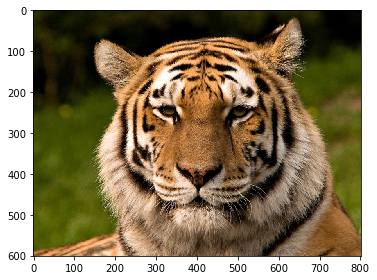

In [4]:
imshow(img_green_pixel)

In [5]:
import numpy
numpy.array_equal(img, img_green_pixel)

False

## Изменение цвета прямоугольника

Загрузите изображение из файла `tiger-gray.png`. Оно имеет нечетное количество строк и столбцов. В центре этого изображения находится прямоугольник размером 7 строк и 15 столбцов. Поменяйте его цвет на розовый rgb(255, 192, 203) и сохраните в файл `tiger-pink.png`.

In [6]:
img = imread('images/tiger-gray.png')

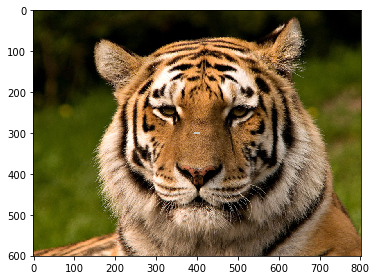

In [7]:
imshow(img)

Проверим, правильно ли мы выделям прямоугольник:

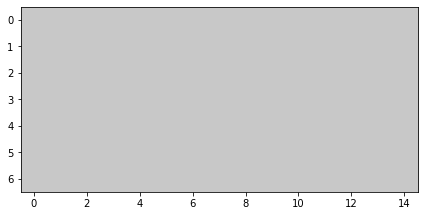

In [8]:
row = img.shape[0]//2
col = img.shape[1]//2
imshow(img[row-3:row+4, col-7:col+8])

In [9]:
img[row-3:row+4, col-7:col+8] = [255, 192, 203]

/home/leo/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


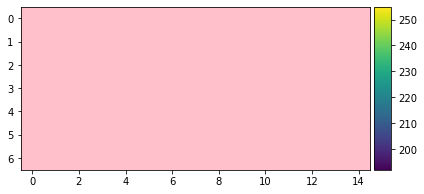

In [10]:
imshow(img[row-3:row+4, col-7:col+8])

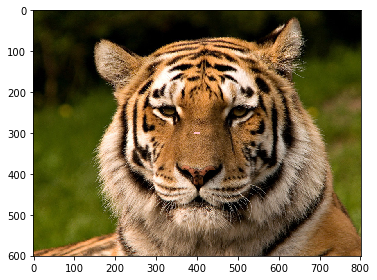

In [11]:
imshow(img)

In [12]:
imsave('images/tiger-pink.png', img)

## Определение рамки изображения

Загрузите изображение из файла `tiger-border.png`. Изображение состоит из рамки сплошного цвета и внутренней части изображения. Цвет рамки можно узнать, посмотрев на левый верхний пиксель. Рамка может иметь разную ширину со всех четырех сторон. Определите размеры рамки и выведите эти размеры через пробел. Размеры рамки выводите в следующем порядке: левый, верхний, правый, нижний.

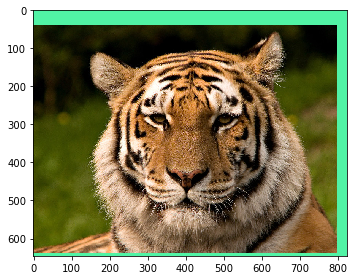

In [13]:
img = imread('images/tiger-border.png')
imshow(img)

In [14]:
img.shape

(646, 826, 3)

In [15]:
border_color = img[0, 0]
rows_num, cols_num, _ = img.shape
i, j, k, m = 0, 0, rows_num-1, cols_num-1

while True:
    pixel_color = img[i, j]
    j += 1  # смещаемся по столбцам
    # проверяем все строки j-го столбца
    if numpy.all(img[:, j] == border_color):
        continue
    else:
        left = j
        break

while True:
    pixel_color = img[i, j]
    i += 1  # смещаемся по строкам
    # проверяем все столбцы i-ой строки
    if numpy.all(img[i, :] == border_color):
        continue
    else:
        top = i
        break

        
while True:
    pixel_color = img[k, m]
    m -= 1  # смещаемся по столбцам от правого нижнего угла
    if numpy.all(img[:, m] == border_color):
        continue
    else:
        right = cols_num-m-1
        break
        
        
while True:
    pixel_color = img[k, m]
    k -= 1
    if numpy.all(img[k, :] == border_color):
        continue
    else:
        bottom = rows_num-k-1
        break

        
print(left, top, right, bottom)

1 39 25 7


# 2.2. Арифметические операции. Каналы. Вычисление яркости изображения

Прочитайте изображение из файла `tiger-color_1.png`. У этого изображения нечетное количество строк и столбцов. Вычислите негатив изображения и сохраните его в файл `tiger-negative.png`.

Для сравнения двух изображений можно воспользоваться функцией numpy.array_equal.

In [16]:
img = imread('images/tiger-color_1.png')

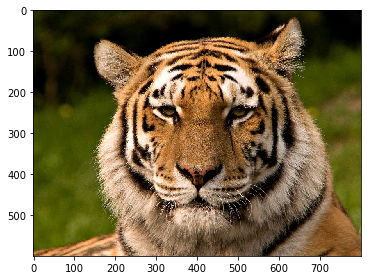

In [17]:
imshow(img)

In [18]:
img[0, 0]

array([41, 46,  6], dtype=uint8)

In [19]:
imsave('images/tiger-negative.png', 255-img)

## Поменять местами каналы изображения

Загрузите изображение из файла `tiger-color.png`. У этого изображения поменяйте местами каналы так, чтобы вместо порядка RGB каналы шли в порядке BRG. Сохраните изображение с измененными каналами в файл `tiger_brg.png`.

In [20]:
from numpy import dstack

img = imread('images/tiger-color.png')
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

img_combined = dstack((b, r, g))
       
imsave('images/tiger_brg.png', img_combined)

## Подсчет яркости изображения

Загрузите цветное изображение из файла `tiger-color.png`. Подсчитайте яркость этого изображения и сохраните в файл `tiger-y.png`. Результирующее изображение должно быть одноканальным. Для подсчета яркости используйте формулу $Y = 0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$, не забудьте сначала перевести изображение в вещественные числа (функция `img_as_float`), а затем в целые числа (функция `img_as_ubyte`).

In [21]:
from numpy import dstack
from skimage import img_as_float, img_as_ubyte

img = imread('images/tiger-color.png')
img = img_as_float(img)
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

gray = 0.2126*r + 0.7152*g + 0.0722*b
gray = img_as_ubyte(gray)

imsave('images/tiger_brg.png', gray)

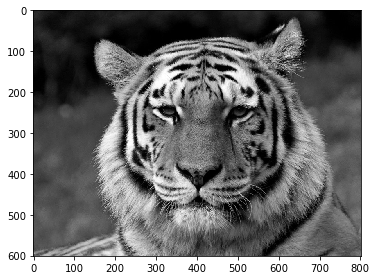

In [22]:
imshow(gray)

# 2.3. Сопоставление фотографий Прокудина-Горского

Проведем загрузку изображения и разделение на три канала. Достаточно разделить изображение на три равные части по высоте. Чтобы более точно найти точки раздела, определим локальные минимумы яркости по высоте.

In [130]:
from skimage import img_as_float

import numpy as np

img = imread('images/09.png')

def get_black_row_indices(img):
    """Return accurate indices of black stripes center lines
    """
    sa = 50  # space around point to find minimum
    rows_num = img.shape[0]
    slice_indices = [rows_num//3, 2*rows_num//3]
    for i, si in enumerate(slice_indices):
        res = -sa + np.argmin(img.mean(axis=1)[si-sa:si+sa])
        slice_indices[i] += res
    return slice_indices


def get_trimmed_frame(frame):
    """Cut out white and black stripes by differentiation
    """
    offset = 40
    
    col_mean_diff = np.abs(np.diff(frame.mean(axis=0)))
    col_indices_of_max_diffs = np.where(col_mean_diff > offset)[0]
    col_mdd = np.argmax(np.diff(col_indices_of_max_diffs))

    left_border = col_indices_of_max_diffs[col_mdd]
    right_border = col_indices_of_max_diffs[col_mdd+1]
    
    row_mean_diff = np.abs(np.diff(frame.mean(axis=1)))
    row_indices_of_max_diffs = np.where(row_mean_diff > offset)[0]
    row_mdd = np.argmax(np.diff(row_indices_of_max_diffs))

    top_border = row_indices_of_max_diffs[row_mdd]
    bottom_border = row_indices_of_max_diffs[row_mdd+1]

    return img_as_float(frame[top_border:bottom_border,
                 left_border:right_border])


def get_three_channels(img):
    """Return three RGB channel frames
    """
    bg_i, gr_i = get_black_row_indices(img)
    B = get_trimmed_frame(img[:bg_i, :])
    G = get_trimmed_frame(img[bg_i:gr_i, :])
    R = get_trimmed_frame(img[gr_i:, :])
    return R, G, B

R, G, B = get_three_channels(img)

def line_by_line(X, C):
    i, j, i_opt, j_opt, s = 0, 0, 0, 0, 0
    for i in range(X.shape[0]-C.shape[0]):
        for j in range(X.shape[1]-C.shape[1]):
            Y = np.zeros(X.shape)
            Y[i:i+C.shape[0], j:j+C.shape[1]] = C
            s_new = np.multiply(X, Y).sum()
            if s_new > s:
                s = s_new
                i_opt, j_opt = i, j
    i, j = i_opt, j_opt
    Y = np.zeros(X.shape)
    Y[i:i+C.shape[0], j:j+C.shape[1]] = C
    return Y


def find_align():
    X = np.pad(array = G, pad_width = 15, constant_values = 0)
    #i_opt_R, j_opt_R = line_by_line(X, R)
    #i_opt_B, j_opt_B = line_by_line(X, B)
    XR = line_by_line(X, R)
    XB = line_by_line(X, B)
    imshow(np.dstack((XR, X, XB)))
    
find_align()

ValueError: attempt to get argmax of an empty sequence